# Using Machine Learning Methods to predict whether or not somebody has a Mental Health issue within the Technology Industry

### Student ID: 670041990

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.exceptions import ConvergenceWarning

dia_all = pd.read_csv("mental_health_data.csv") #Loads full dataset

#This line will suppress the errors which come up when the dataframe is being overwritten (which is what we want to do)
pd.options.mode.chained_assignment = None  #default='warn'

#Hides ConvergenceWarnings, which are a problem later on, due to lack of data for convergence, so they are just hidden.
warnings.simplefilter('ignore', category = ConvergenceWarning)

## Preprocessing

In [2]:
# =========================================
# ==============CLEANING DATA==============
# =========================================



#Renaming the columns of the dataset
#mental health abbreviated to mh to save space, and make column names more consise
#physical health abbreviated to ph

#Renaming the columns to be more workable
column_names = ['self_employed', 'num_of_employees', 'tech_company', 'tech_role', 'mh_benefits',
               'mh_benefits_awareness', 'mh_discussion', 'employer_resources',
               'mh_anonymity_for_help', 'mh_leave_ease','neg_consquences_with_emp_mh_discussion',
               'neg_consequences_with_emp_ph_discussion', 'mh_coworkers_discussion_comfort',
               'mh_supervisor_discussion_comfort', 'emp_mh_seriousness',
               'observed_or_heard_neg_consequence_mh', 'medical_insurance_mental_health',
               'mh_recources_avaliability_awareness', 
                    'mh_diagnosed&revealed_clients',
               'neg_impact_diagnosed&revealed_clients', 'mh_diagnosed&revealed_coworkers',
               'neg_impact_diagnosed&revealed_coworkers', 'mh_productivity_affect',
               'mh_productivity_affect_percent', 
                    'previous_emp', 'prev_emp_mh_benefits',
               'prev_emp_mh_benefits_awareness', 'prev_employers_mh_discussion',
               'prev_emp_mh_resources', 'prev_emp_mh_anonymity_for_help',
               'prev_emp_neg_consequence_with_emp_mh_discussion',
               'prev_emp_neg_consequence_with_emp_ph_discussion',
               'prev_emp_coworkers_discussion_comfort', 'prev_emp_supervisor_discussion_comfort',
               'prev_emp_mh_seriousness', 'prev_emp_observed_or_heard_neg_consequence_mh',
                    'ph_in_interview', 'why/why_not', 'mh_in_interview', 'why/why_not2', 'mh_hurt_career',
               'mh_neg_view_coworker', 'mh_sharing_friends/fam', 'mh_bad_response_work',
               'mh_others_observation_lower_motivation_to_share', 
                'family_history_mh','mh_disorder_past', 'mh_disorder_present', 'diagnosed_conditions', 'mh_personal_diagnosis',
               'mh_professional_diagnosis', 'professional_diagnosed_conditions', 'mh_sought_treatment',
               'mh_treatment_interferes_with_work', 'mh_non_treatment_treatment_interferes_with_work',
                   'age', 'gender', 'country', 'state', 'work_country', 'work_US_state',
               'work_position', 'remote_work']

#This command just sets the column_names which are defined above and links it to the data
dia_all.columns = column_names

In [3]:
#Catagorising the gender column

#This returns how many unique values are within a column (70 unique values)
dia_all['gender'].nunique()

#Making all of the items in the gender column lowercase to decrease the num of unique values
if dia_all['gender'].nunique() > 3:
    dia_all['gender'] = dia_all['gender'].str.lower() #(57 unique values)

dia_all['gender'].replace(to_replace = [
    'male', 'cis male', 'cis man', 'cisdude', 'dude',
    'i\'m a man why didn\'t you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? ',
    'm', 'm|', 'mail', 'male (cis)', 'male (trans, ftm)', 'male.', 'malr', 'man', 'sex is male', 'male '
], value = 1, inplace = True)

dia_all['gender'].replace(to_replace = [
    'afab', 'cis female', 'cis-woman', 'cisgender female', 'f', 'fem', 'female',
    'female (props for making this a freeform field, though)', 'female assigned at birth ',
    'female or multi-gender femme', 'female/woman', 'fm', 'i identify as female.', 'mtf', 'transgender woman',
    'transitioned, m2f', 'woman', 'female ', 'cis female ', ' female'], value = 2, inplace = True)

dia_all['gender'].replace(to_replace = [
    'agender', 'androgynous', 'bigender', 'enby', 'female-bodied; no feelings about gender', 'fluid',
    'genderfluid', 'genderfluid (born female)', 'genderflux demi-girl', 'genderqueer', 'genderqueer woman', 'human',
    'male 9:1 female, roughly', 'male/genderqueer', 'n/a', 'nb masculine', 'non-binary', 'nonbinary',
    'none of your business', 'other', 'other/transfeminine', 'queer', 'unicorn', 'genderqueer woman'
], value = 3, inplace = True)

In [4]:
#Dealing with ages which are outside of the working age
#Finding the mean of all the ages within the working age (15-64)
mean_age = dia_all[(dia_all['age'] >= 15) | (dia_all['age'] <= 64)]['age'].mean()

#Replacing the values which are outside the working age with the average age
dia_all['age'].replace(to_replace = dia_all[(dia_all['age'] < 15) | (dia_all['age'] > 64)]['age'].tolist(),
                       value = mean_age, inplace = True)

In [5]:
#Dropping work_country and work_US_state

dia_all.drop(['work_country', 'work_US_state'], axis = 1, inplace = True)

#Dropping the why/why not questions

dia_all.drop(['why/why_not','why/why_not2'], axis = 1, inplace = True)

In [6]:
# =========================================
# ==============MISSING DATA===============
# =========================================



#Dropping all questions with a less than 50% answer rate:
count = 0 #Count is 13, so 13 columns are dropped
low_answer_rate = []
if dia_all.shape[0] > 60:
    for col in dia_all:
            if(sum(pd.isnull(dia_all[col]))>dia_all.shape[0]/2):
                count += 1
                low_answer_rate.append(col)
                dia_all.drop([col], axis = 1, inplace = True)
        
# These are the columns which are dropped due to low response rate
# low_answer_rate = ['tech_role',
#  'medical_insurance_mental_health',
#  'mh_recources_avaliability_awareness',
#  'mh_diagnosed&revealed_clients',
#  'neg_impact_diagnosed&revealed_clients',
#  'mh_diagnosed&revealed_coworkers',
#  'neg_impact_diagnosed&revealed_coworkers',
#  'mh_productivity_affect',
#  'mh_productivity_affect_percent',
#  'mh_others_observation_lower_motivation_to_share',
#  'diagnosed_conditions',
#  'mh_personal_diagnosis',
#  'professional_diagnosed_conditions']

In [7]:
#Before imputing the missing values,I wanted to split the data into United States and the rest of the world,
#This is so that I could use state later on when comparing, and did not have to worry about it affecting the 
#data because one value was more common than the last

#Once the imputing has been done, the two datasets will be re-merged

USA = dia_all[dia_all['country'] == 'United States of America']

rest_of_world = dia_all[dia_all['country'] != 'United States of America']
rest_of_world_to_drop = ['state']

rest_of_world.drop(rest_of_world_to_drop, axis = 1, inplace = True)

In [8]:
#Imputing values using sklearn.impute.SimpleImputer

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
#Fitting the DataFrame
imp.fit(USA)
imp_data_USA = pd.DataFrame(data = imp.transform(USA), columns = USA.columns)

imp.fit(rest_of_world)
imp_data_rest = pd.DataFrame(data = imp.transform(rest_of_world), columns = rest_of_world.columns)

#Remerging the data

imp_data = pd.concat([imp_data_USA, imp_data_rest], sort = True)

In [9]:
# =========================================
# ==============ENCODING DATA==============
# =========================================



#Encoding data (Turning data into numbers rather than written responses)

#Changing num_of_employees to be the single values, rather than ranges. Set to be the maximum of the range.
#If the company has more than 1000 employees, change it to 5000 as that is large enough.

imp_data['num_of_employees'] = imp_data['num_of_employees'].replace({'1-5' : 5,
                                                                   '6-25' : 25,
                                                                   '26-100' : 100,
                                                                   '100-500' : 500,
                                                                   '500-1000' : 1000,
                                                                   'More than 1000' : 5000})

#'YES' = 1, 'NO' = 0, 'MAYBE/I don't know/ I'm not sure' = 2


imp_data = imp_data.replace({'Yes' : 1, 'Very easy' : 1,'I was aware of some' : 1,'Yes, I was aware of all of them' : 1,
                  'Yes, they all did' : 1, 'Yes, always' : 1,'Yes, all of them' : 1,
                  'Yes, at all of my previous employers' : 1, 'Yes, I think it would' : 1,
                  'Yes, they do' : 1, 'Yes, I observed' : 1, 'Often' : 1, 'Always' : 1,
                  'Somewhat open' : 1, 'Yes, I experienced' : 1, 'Yes, I think they would' : 1,
                  'Yes, I think it would' : 1,'Yes, it has' : 1,
                  
                  'No' : 0, 'Somewhat easy' : 0, 'No, I only became aware later' : 0, 
                  'N/A (not currently aware)' : 0, 'No, none did' : 0, 'None did' : 0,
                  'None of them' : 0, 'No, at none of my previous employers' : 0,
                  "No, I don't think it would happen" : 0, "No, I don't think they would" : 0,
                  'No, it has not' : 0, "No, I don't think it would" : 0,
                  'No, they do not' : 0, 'Rarely' : 0, 'Never' : 0, 'Neutral' : 0,
                  
                  "I don't know" : 2, "I am not sure" : 2, 'N/A' : 2, 'Not eligible for coverage / N/A' : 2,  
                  'Neither easy nor difficult' : 2,  'Maybe' : 2, 'Very open' : 2, 'Maybe/Not sure' : 2,  
                  
                  'Sometimes' : 3, 'Some of them' : 3,'Some of my previous employers' : 3,'Some did' : 3, 
                  
                  'Somewhat difficult' : -1, 'Somewhat not open' : -1,
                  
                  'Very difficult' : -2, 'Not open at all' : -2,
                  
                  'Not applicable to me (I do not have a mental illness)' : 4, 'Not applicable to me' : 4, 
                   } )


In [10]:
#Changing countries which are not in the permissable list (USA/UK/Aus/GER/Netherlands)

permissable_countries = ['United States of America', 'United Kingdom', 'Australia', 'Germany', 'Netherlands']

imp_data.loc[~imp_data['country'].isin(permissable_countries), 'country'] = 'Other'

In [11]:
#Encoding the location/state

#Encoding data and adding it to the original DataFrame

imp_data = pd.concat([imp_data, pd.get_dummies(imp_data['country'], prefix = 'country')], axis = 1)

#Dropping the original country from the DataFrame
imp_data.drop(['country'], axis = 1, inplace = True)

In [12]:
#Splitting the work_position data into multiple columns.
position = imp_data['work_position'].str.join('').str.get_dummies(sep='|')

imp_data = pd.concat([imp_data, imp_data['work_position'].str.join('').str.get_dummies(sep='|')], axis = 1)

imp_data.drop('work_position', axis = 1, inplace = True)

In [13]:
#Splits the data into people who are self-employed and those who are not.
self_employed =imp_data[imp_data['self_employed'] == 1] 
employed = imp_data[imp_data['self_employed'] == 0]

In [14]:
#These are the columns which I am choosing to drop as they all are answerd with NaN for self-employed people,
#and I want to use the self-employed data, not just get rid of it.
to_drop = ['num_of_employees', 'tech_company', 'mh_benefits', 'mh_benefits_awareness',
          'mh_discussion', 'employer_resources', 'mh_anonymity_for_help', 'mh_leave_ease',
          'neg_consquences_with_emp_mh_discussion', 'neg_consequences_with_emp_ph_discussion',
          'mh_coworkers_discussion_comfort', 'mh_supervisor_discussion_comfort', 'emp_mh_seriousness',
          'observed_or_heard_neg_consequence_mh']

self_employed = self_employed.drop(labels=to_drop, axis = 1)

## Machine Learning

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#Excluding state column from the data to be learnt, as it is not encoded.

cols_employed_numeric = [cols for cols in employed.columns if employed[cols].dtype in ['int64', 'float64']]
cols_self_employed_numeric = [cols for cols in self_employed.columns if self_employed[cols].dtype in ['int64', 'float64']]

employed = employed[cols_employed_numeric]
self_employed = self_employed[cols_self_employed_numeric]

#Splitting the data into variables and target

cols_employed = [col for col in employed.columns if col not in ['mh_disorder_present']]

cols_self_employed = [col for col in self_employed.columns if col not in ['mh_disorder_present']]

employed_vars = employed[cols_employed]
employed_tar = employed['mh_disorder_present']

self_employed_vars = self_employed[cols_self_employed]
self_employed_tar = self_employed['mh_disorder_present']

In [16]:
#Splitting both sets of data into test/train data.

def data_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    return X_train, X_test, y_train, y_test

employed_X_train, employed_X_test, employed_y_train, employed_y_test = data_split(employed_vars, employed_tar)
self_employed_X_train, self_employed_X_test, self_employed_y_train, self_employed_y_test = data_split(self_employed_vars, self_employed_tar)

In [17]:
#Building a function so that multiple models can be assessed 

def model(model, name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('====', name, '====', '\n',
            'Accuracy: ', accuracy_score(y_test, preds), '\n',
          confusion_matrix(y_test, preds), '\n',
         )
    return confusion_matrix

In [18]:
#Random Forests
random_forest = RandomForestClassifier(n_estimators = 1000, max_depth = 10, random_state = 0)
model(random_forest, 'Employed Random Forest', employed_X_train, employed_X_test, employed_y_train.values.ravel(), employed_y_test.values.ravel())
model(random_forest, 'Self Employed Random Forest', self_employed_X_train, self_employed_X_test, self_employed_y_train, self_employed_y_test)

#Linear SVC
lin_svc = LinearSVC(random_state=0, tol=1e-5)
model(lin_svc, 'Employed Linear Support Vector', employed_X_train, employed_X_test, employed_y_train.values.ravel(), employed_y_test.values.ravel())
model(lin_svc, 'Self Employed Linear Suppoert Vector', self_employed_X_train, self_employed_X_test, self_employed_y_train, self_employed_y_test)

==== Employed Random Forest ==== 
 Accuracy:  0.7616279069767442 
 [[110  20   9]
 [  2 125   8]
 [ 14  29  27]] 

==== Self Employed Random Forest ==== 
 Accuracy:  0.7241379310344828 
 [[21  3  3]
 [ 2 31  3]
 [ 4  9 11]] 

==== Employed Linear Support Vector ==== 
 Accuracy:  0.49127906976744184 
 [[69 11 59]
 [10 49 76]
 [ 7 12 51]] 

==== Self Employed Linear Suppoert Vector ==== 
 Accuracy:  0.47126436781609193 
 [[22  1  4]
 [14 11 11]
 [13  3  8]] 



<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

## Tuning Parameters

The following section will attempt to improve the accuracy of the random forest classifier, by changing the variables (such as the number of trees etc). Different values are selected randomly from the selected range (given before the random grid), with the variables which produce the best outcome being the variables which are to be used in the final model.

In [20]:
#This is just repeating the accuracy of each model so that it is easier to compare and looks neater

def parameter_models(model, name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    print('====', name, '====', '\n',
         'Accuracy: ', accuracy, '\n')
    return accuracy

# Making the two models (employed and self-employed)

base_model_employed = random_forest

base_self_employed_model = random_forest

# Running the model using the parameter_model function

base_model_employed_accuracy = parameter_models(base_model_employed, 'Employed base model', employed_X_train, employed_X_test, employed_y_train, employed_y_test)

base_model_self_employed_accuracy = parameter_models(base_self_employed_model, 'Self-Employed base model', self_employed_X_train, self_employed_X_test,
                                                     self_employed_y_train, self_employed_y_test)

==== Employed base model ==== 
 Accuracy:  0.7616279069767442 

==== Self-Employed base model ==== 
 Accuracy:  0.7241379310344828 



In [21]:
from sklearn.model_selection import RandomizedSearchCV

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop = 2000, num = 10)]

#number of features to consider at every split
max_features = ['auto', 'sqrt']

#maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(10,110, num = 11)]
max_depth.append(None)

#minimum number of samples required to split a node
min_samples_split = [2,5,10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Creating the random grid

random_grid = { 'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

#Creating the base model to tune
rf = RandomForestClassifier()

#Telling the model which are the random variables to use
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

#Training the models (using .fit)
employed_model = rf_random.fit(employed_X_train, employed_y_train)

self_employed_model = rf_random.fit(self_employed_X_train, self_employed_y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


In [22]:
# Gives the best parameters from within the RandomizeedSearchCV 
randomizedsearchcv_employed_parameters = employed_model.best_params_
randomizedsearchcv_self_employed_parameters = self_employed_model.best_params_

# Print function to show the best parameters for each of the models

def param_print(name, params):
    print('====', name, '====', '\n',
         params, '\n')
    
param_print('Employed RandomizedSearchCV Parameters', randomizedsearchcv_employed_parameters)
param_print('Self Employed RandomizedSearchCV Parameters', randomizedsearchcv_self_employed_parameters)

==== Employed RandomizedSearchCV Parameters ==== 
 {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False} 

==== Self Employed RandomizedSearchCV Parameters ==== 
 {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False} 



In [23]:
# Building the new model from the RandomizedSearchCV parameters

randomizedsearchcv_employed_model = RandomForestClassifier(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 2,
                                                   min_samples_split = 5, n_estimators = 1400)

randomizedsearchcv_self_employed_model = RandomForestClassifier(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 2,
                                                   min_samples_split = 5, n_estimators = 1400)

# Rerunning the models using the parameters which are found using the RandomizedSearchCV and showing their accuracies
employed_accuracy_randomizedsearchcv = parameter_models(randomizedsearchcv_employed_model, 'Employed RandomizedSearchCV parameter model', 
                                                        employed_X_train, employed_X_test, employed_y_train, employed_y_test)

self_employed_accuracy_randomizedsearchcv = parameter_models(randomizedsearchcv_self_employed_model, 'Self-Employed RandomizedSearchCV parameter model', 
                                                             self_employed_X_train, self_employed_X_test, self_employed_y_train, self_employed_y_test)

==== Employed RandomizedSearchCV parameter model ==== 
 Accuracy:  0.7587209302325582 

==== Self-Employed RandomizedSearchCV parameter model ==== 
 Accuracy:  0.7126436781609196 



In [24]:
#Finding the % difference in accuracy between the base model and the model with tuned perameters from the RandomizedSearchCV model

diff_employed = 100 * (employed_accuracy_randomizedsearchcv - base_model_employed_accuracy)/base_model_employed_accuracy

diff_self_employed = 100 * (self_employed_accuracy_randomizedsearchcv - base_model_self_employed_accuracy)/base_model_self_employed_accuracy

#Creating a print function so that all formats of the accuracy comparisons outputs are the same.
def comp_print(name, accuracy):
    print('====', name, '====', '\n',
         accuracy, '% \n')
    
comp_print('Employed RandomizedSearchCV against Base Model change', diff_employed)
comp_print('Self Employed RandomizedSearchCV against Base Model change', diff_self_employed)

==== Employed RandomizedSearchCV against Base Model change ==== 
 -0.3816793893129778 % 

==== Self Employed RandomizedSearchCV against Base Model change ==== 
 -1.5873015873015854 % 



In [25]:
#Random search narrowed down the optimal parameter values, grid search will narrow it down even further.

from sklearn.model_selection import GridSearchCV

#Creating a parameter grid based on the results from the random search

param_grid_employed = {
    'bootstrap' : [True],
    'max_depth' : [10, 15, 20, 25],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1,2,3],
    'min_samples_split' : [8, 10, 12],
    'n_estimators' : [700, 800, 900, 1000, 1200, 1500]}

param_grid_self_employed = {
    'bootstrap' : [True],
    'max_depth' : [45, 50, 55, 60, 65, 75],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1,2,3],
    'min_samples_split' : [8, 10, 12],
    'n_estimators' : [300, 400, 500, 600, 700, 800]}


#Making the grid search model

def grid_search(param_grid):
    grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
    
    return grid_search

# Running the grid_search function on both the employed and self employed model
grid_search_employed = grid_search(param_grid_employed)
grid_search_self_employed = grid_search(param_grid_self_employed)

In [26]:
# Running the models with the grid_search parameter for both models

employed_grid_search = grid_search_employed.fit(employed_X_train, employed_y_train)
self_employed_grid_search = grid_search_self_employed.fit(self_employed_X_train, self_employed_y_train)

# The next line finds the best parameters for the employed model
employed_grid_params = employed_grid_search.best_params_
self_employed_grid_params = self_employed_grid_search.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  4.3min finished


Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  3.0min finished


In [27]:
# Calling the print function to show the best parameters for each model found by GridSearchCV

param_print('Employed GridSearchCV Parameters', employed_grid_params)
param_print('Self Employed GridSearchCV Paramets', self_employed_grid_params)

==== Employed GridSearchCV Parameters ==== 
 {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1000} 

==== Self Employed GridSearchCV Paramets ==== 
 {'bootstrap': True, 'max_depth': 45, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 300} 



In [28]:
#Finding the accuracy from the GridSearchCV models

# Creating the models from the parameters found above
gridsearch_employed_model = RandomForestClassifier(bootstrap = True, max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1,
                                                   min_samples_split = 12, n_estimators = 900)

gridsearch_self_employed_model = RandomForestClassifier(bootstrap = True, max_depth = 45, max_features = 'sqrt', min_samples_leaf = 1,
                                                   min_samples_split = 10, n_estimators = 500)


gridsearch_employed_accuracy = parameter_models(gridsearch_employed_model, 'Employed GridSearchCV model', employed_X_train, 
                                                employed_X_test, employed_y_train, employed_y_test)

gridsearch_self_employed_accuracy = parameter_models(gridsearch_self_employed_model, 'Self Employed GridSearchCV model', self_employed_X_train, 
                                                self_employed_X_test, self_employed_y_train, self_employed_y_test)

==== Employed GridSearchCV model ==== 
 Accuracy:  0.7616279069767442 

==== Self Employed GridSearchCV model ==== 
 Accuracy:  0.735632183908046 



Comparing the accuracy of the GridSearchCV models to the other models

In [29]:
# Comparing GridSearchCV model to the base model

base_vs_gridsearch_employed_accuracy = 100 * (gridsearch_employed_accuracy - base_model_employed_accuracy)/base_model_employed_accuracy
base_vs_gridsearch_self_employed_accuracy = 100 * (gridsearch_self_employed_accuracy - base_model_self_employed_accuracy)/base_model_self_employed_accuracy

# Comparing GridSearchCV model to the RandomizedSearchCV model

randomizedsearch_vs_gridsearch_employed_accuracy = 100 * (gridsearch_employed_accuracy - employed_accuracy_randomizedsearchcv)/employed_accuracy_randomizedsearchcv
randomizedsearch_vs_gridsearch_self_employed_accuracy = 100 * (gridsearch_self_employed_accuracy - self_employed_accuracy_randomizedsearchcv)/self_employed_accuracy_randomizedsearchcv

# Using the function defined previously to show the differences between the different models accuracy %s.

print('=========================================', '\n',
      '==== GRIDSEARCHCV AGAINST BASE MODEL ==== \n',
     '========================================= \n')
comp_print('Employed GridSearchCV against Base Model change', base_vs_gridsearch_employed_accuracy)
comp_print('Self Employed GridSearchCV against Base Model change', base_vs_gridsearch_self_employed_accuracy)

print('=========================================', '\n',
      '==== GRIDSEARCHCV AGAINST RANDOMIZEDSEARCHCV MODEL ==== \n',
     '========================================= \n')
comp_print('Employed GridSearchCV against RandomizedSearchCV change', randomizedsearch_vs_gridsearch_employed_accuracy)
comp_print('Self Employed GridSearchCV against RandomizedSearchCV change', randomizedsearch_vs_gridsearch_self_employed_accuracy)

 ==== GRIDSEARCHCV AGAINST BASE MODEL ==== 

==== Employed GridSearchCV against Base Model change ==== 
 0.0 % 

==== Self Employed GridSearchCV against Base Model change ==== 
 1.5873015873015854 % 

 ==== GRIDSEARCHCV AGAINST RANDOMIZEDSEARCHCV MODEL ==== 

==== Employed GridSearchCV against RandomizedSearchCV change ==== 
 0.38314176245210796 % 

==== Self Employed GridSearchCV against RandomizedSearchCV change ==== 
 3.225806451612899 % 



## Final Model

In [30]:
#Final Employed model
random_forest_employed = RandomForestClassifier(bootstrap = True, max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, 
                                                min_samples_split = 12, n_estimators = 900)

employed_final = model(random_forest_employed, 'Employed Random Forest', employed_X_train, employed_X_test, employed_y_train.values.ravel(), employed_y_test.values.ravel())

#Final self-employed model
random_forest_self_employed = RandomForestClassifier(bootstrap = True, max_depth = 45, max_features = 'sqrt', min_samples_leaf = 1,
                                                     min_samples_split = 10, n_estimators = 500)

self_employed_final = model(random_forest_self_employed, 'Self Employed Random Forest', self_employed_X_train, self_employed_X_test, self_employed_y_train, self_employed_y_test)

==== Employed Random Forest ==== 
 Accuracy:  0.752906976744186 
 [[109  22   8]
 [  4 123   8]
 [ 15  28  27]] 

==== Self Employed Random Forest ==== 
 Accuracy:  0.7241379310344828 
 [[21  3  3]
 [ 2 33  1]
 [ 6  9  9]] 



## Visualisation

TODO:

Plot confusion matrices for both of the models

Plot a feature importance matrix for both of the models, including maybe just the top 5 features or something

Conclusion can then go on to speak about how some of the key features need to be reduced to increase peoples mental health

In [31]:
# Creating a function which will show the importance of each feature for both models

def feature_importance(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    # The next line creates a dataframe which will include the feature names and the feature importances
    feat_importance = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)
    return feat_importance

# Calculates the feature importance for the employed
employed_feature_importance = feature_importance('Employed Feature Importance', random_forest_employed, employed_X_train, employed_y_train, employed_X_test, employed_y_test)

# Shows the top 10 most important features
employed_feature_importance.head(10)

,importance
mh_non_treatment_treatment_interferes_with_work,0.160462
mh_disorder_past,0.135664
mh_professional_diagnosis,0.124361
mh_treatment_interferes_with_work,0.098668
mh_sought_treatment,0.057994
family_history_mh,0.034813
mh_sharing_friends/fam,0.034136
age,0.033601
mh_leave_ease,0.019527
num_of_employees,0.016109


In [32]:
# Calculates the feature importance for self-employed
self_employed_feature_importance = feature_importance('Self Employed Feature Importance', random_forest_self_employed, 
                                                      self_employed_X_train, self_employed_y_train, self_employed_X_test, self_employed_y_test)

# Shows the top 10 most important features for self-employed
self_employed_feature_importance.head(10)

,importance
mh_disorder_past,0.167483
mh_professional_diagnosis,0.125347
mh_non_treatment_treatment_interferes_with_work,0.124386
mh_treatment_interferes_with_work,0.077992
mh_sought_treatment,0.049977
mh_sharing_friends/fam,0.046498
family_history_mh,0.042737
age,0.039178
prev_emp_neg_consequence_with_emp_mh_discussion,0.024210
prev_emp_mh_anonymity_for_help,0.018561


In [33]:
# Sum of all of the importances is 1, therefore group them into the top 10, and the remainder as other, will make it look neater

def add_other(dataframe):
    # Getting the first 10 items in the dataframe
    dataframe = dataframe[:10]
    # Finding the sum of the importance of the top 10 features
    sum_importance = sum(dataframe['importance'])
    # Finding the remainder of the importance, which is the rest of the importance of the remaining features
    other_value = 1 - sum_importance
    
    # Adds the other value to the bottom of the dataframe
    dataframe.loc['other'] = [other_value]
    # Changes the features to be a column, rather than being the index
    dataframe.reset_index(inplace=True)
    # Changing the name of the features column to be features, not index
    dataframe.columns = ['feature', 'importance']
    return dataframe

employed_feature_importance = add_other(employed_feature_importance)
self_employed_feature_importance = add_other(self_employed_feature_importance)

employed_feature_importance.head()

,feature,importance
0,mh_non_treatment_treatment_interferes_with_work,0.160462
1,mh_disorder_past,0.135664
2,mh_professional_diagnosis,0.124361
3,mh_treatment_interferes_with_work,0.098668
4,mh_sought_treatment,0.057994


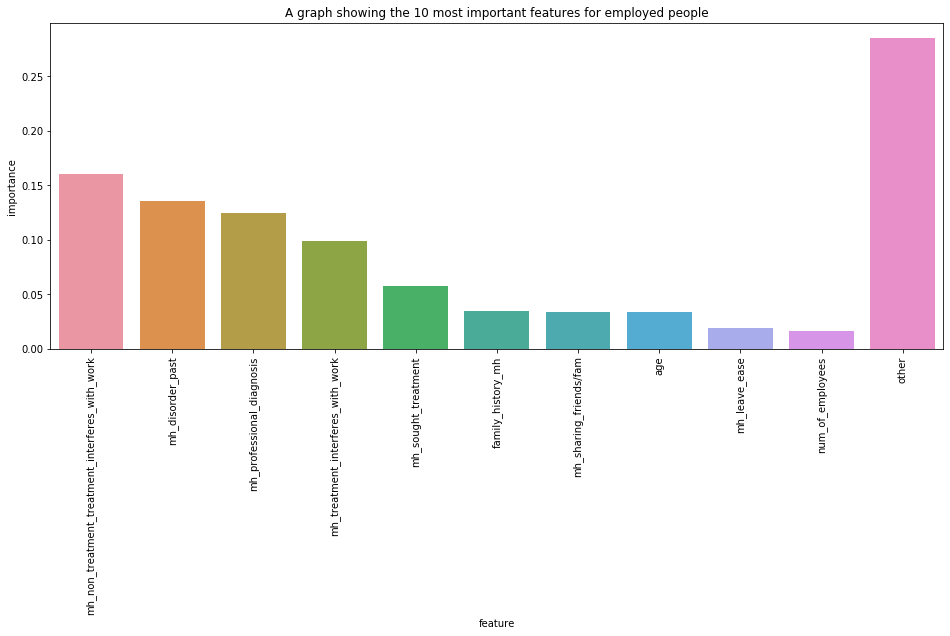

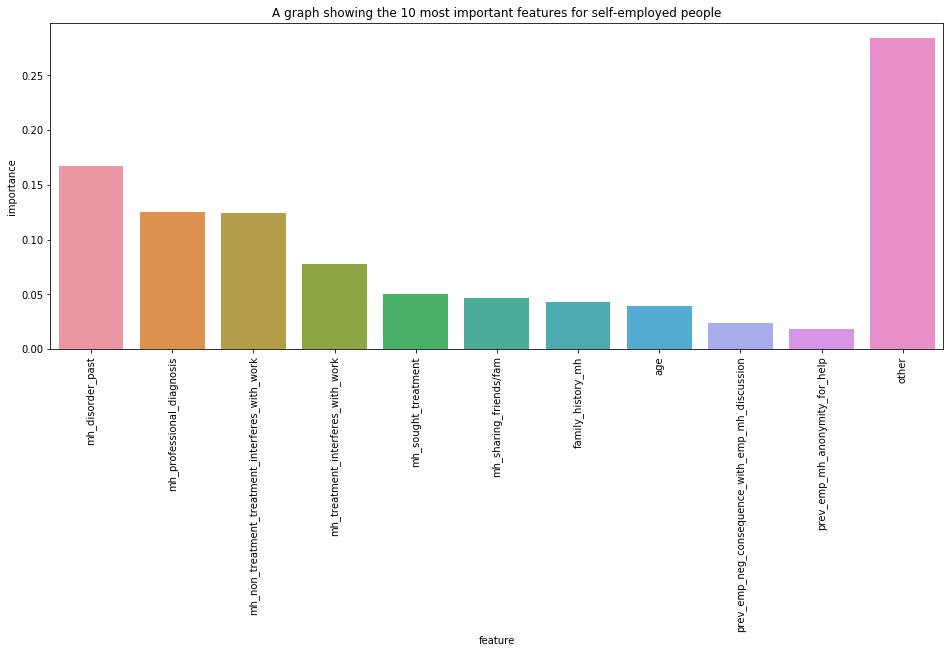

In [34]:
# Creating plots to see the most important features
import matplotlib.pyplot as plt
import seaborn as sns

def make_graph(name, data):
    plt.figure(figsize=(16,6))
    graph = sns.barplot(
            data = data,
            x = 'feature', y = 'importance')
    plt.setp(graph.get_xticklabels(),rotation=90)
    plt.title(name)
    return graph

make_graph('A graph showing the 10 most important features for employed people', employed_feature_importance)
make_graph('A graph showing the 10 most important features for self-employed people', self_employed_feature_importance)

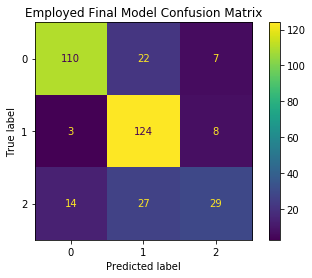

In [39]:
# Plotting confusion matrix for employed model

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(random_forest_employed, employed_X_test, employed_y_test)
plt.title('Employed Final Model Confusion Matrix')
plt.show()

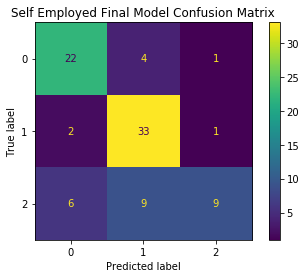

In [40]:
# Plotting confusion matrix for self-employed model

plot_confusion_matrix(random_forest_self_employed, self_employed_X_test, self_employed_y_test)
plt.title('Self Employed Final Model Confusion Matrix')
plt.show()